In [17]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [18]:
'''#extract file csv to images
import numpy as np
import pandas as pd
import os
from PIL import Image


def extract_images_from_csv(csv, column, save_folder, resize=(96, 96)):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for idx, image in enumerate(csv[column]):
        image = np.array(image.split()).astype(np.uint8)
        image = image.reshape(resize[0], resize[1])
        img = Image.fromarray(image, 'L')
        img.save(save_folder+f"img_{idx}.png")


csv = pd.read_csv(dir_test_csv)
extract_images_from_csv(csv, "Image", "/content/gdrive/MyDrive/đồ án/test_img/")
csv_1 = pd.read_csv(dir_train_csv)
extract_images_from_csv(csv_1, "Image", "/content/gdrive/MyDrive/đồ án/train_img/")'''


'#extract file csv to images\nimport numpy as np\nimport pandas as pd\nimport os\nfrom PIL import Image\n\n\ndef extract_images_from_csv(csv, column, save_folder, resize=(96, 96)):\n    if not os.path.exists(save_folder):\n        os.makedirs(save_folder)\n\n    for idx, image in enumerate(csv[column]):\n        image = np.array(image.split()).astype(np.uint8)\n        image = image.reshape(resize[0], resize[1])\n        img = Image.fromarray(image, \'L\')\n        img.save(save_folder+f"img_{idx}.png")\n\n\ncsv = pd.read_csv(dir_test_csv)\nextract_images_from_csv(csv, "Image", "/content/gdrive/MyDrive/đồ án/test_img/")\ncsv_1 = pd.read_csv(dir_train_csv)\nextract_images_from_csv(csv_1, "Image", "/content/gdrive/MyDrive/đồ án/train_img/")'

##Import Library


In [19]:


#Import required libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

##Path

In [20]:
dir_train_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án /facial-keypoints-detection/training/training.csv'
dir_test_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án /facial-keypoints-detection/test/test.csv'

train_data = pd.read_csv(dir_train_csv)
test_data = pd.read_csv(dir_test_csv)

len(train_data),len(test_data)


(7049, 1783)

##Explore Data

In [21]:
#Show sample training data 
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [22]:
#Show sample test data
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


#Check for Null Values

In [23]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [24]:
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

In [25]:
def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

##Processdata and Plot Sample

In [29]:
clean_train_data = train_data.dropna()  
#clean_train_data= train_data.fillna(method = 'ffill', inplace=True)
print("clean_train_data shape:", np.shape(clean_train_data))

clean_train_images = load_images(clean_train_data)
print("Shape of clean_train_images:", np.shape(clean_train_images))
clean_train_keypoints = load_keypoints(clean_train_data)
print("Shape of clean_train_keypoints:", np.shape(clean_train_keypoints))
test_images = load_images(test_data)
print("Shape of test_images:", np.shape(test_images))


clean_train_data shape: (7049, 31)
Shape of clean_train_images: (7049, 96, 96, 1)
Shape of clean_train_keypoints: (7049, 30)
Shape of test_images: (1783, 96, 96, 1)


In [30]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

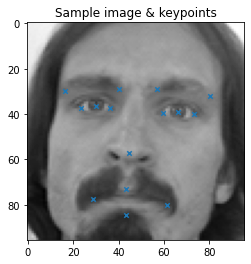

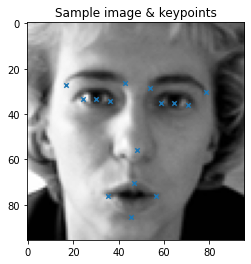

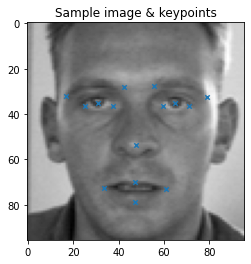

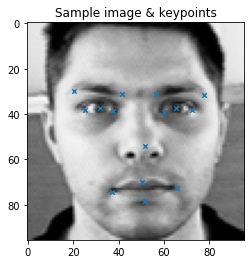

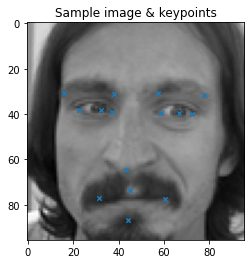

In [31]:
train_images = clean_train_images
train_keypoints = clean_train_keypoints
for i in range(5):
  fig, axis = plt.subplots()
  plot_sample(clean_train_images[i], clean_train_keypoints[i], axis, "Sample image & keypoints")

In [32]:
print("Shape of final train_images:", np.shape(clean_train_images))   
print("Shape of final train_keypoints:", np.shape(clean_train_keypoints))

Shape of final train_images: (7049, 96, 96, 1)
Shape of final train_keypoints: (7049, 30)


#Create Features and Labels for Training Model

In [33]:
def data_loader(dir_img):
    
    # Load dataset file
    data_frame = pd.read_csv(dir_train_csv)
    
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    imgs = np.vstack(data_frame['Image'].values)/ 255.0
    imgs = imgs.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs = imgs.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels = data_frame[data_frame.columns[:-1]].values
    labels = (labels - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels = labels.astype(np.float32) 
    
    # shuffle the train data
#     imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs, labels


In [34]:
X_train, y_train = data_loader(dir_train_csv)
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))


Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)


In [35]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [37]:
len(X_train),len(y_train),len(y_val),len(X_val)

(1712, 1712, 428, 428)

#Creating a CNN model

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
# from keras.optimizers import Adam

## Main model
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(96, 96, 1))) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model




In [39]:
model = the_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

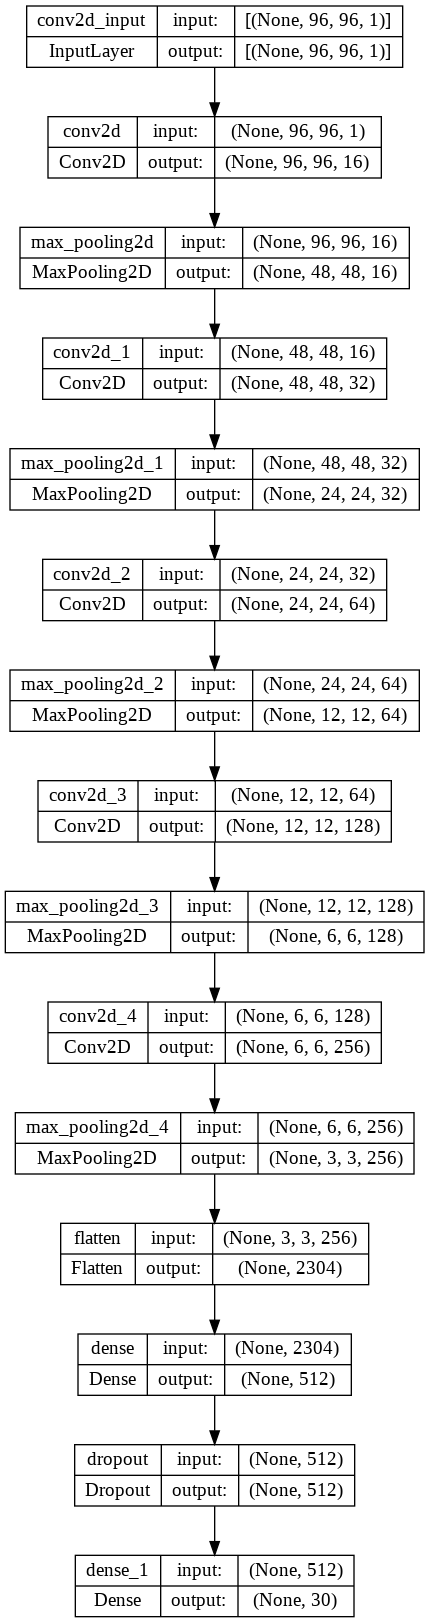

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [41]:

epochs = 60
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_fit = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model1.h5')

Epoch 1/60
27/27 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.4206
Epoch 1: val_loss improved from inf to 0.01096, saving model to checkpoint1.hdf5
27/27 [==============================] - 4s 39ms/step - loss: 0.0342 - accuracy: 0.4206 - val_loss: 0.0110 - val_accuracy: 0.7150
Epoch 2/60
25/27 [==========================>...] - ETA: 0s - loss: 0.0100 - accuracy: 0.5888
Epoch 2: val_loss improved from 0.01096 to 0.00486, saving model to checkpoint1.hdf5
27/27 [==============================] - 1s 21ms/step - loss: 0.0098 - accuracy: 0.5905 - val_loss: 0.0049 - val_accuracy: 0.7150
Epoch 3/60
25/27 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.6119
Epoch 3: val_loss improved from 0.00486 to 0.00431, saving model to checkpoint1.hdf5
27/27 [==============================] - 1s 20ms/step - loss: 0.0072 - accuracy: 0.6127 - val_loss: 0.0043 - val_accuracy: 0.7150
Epoch 4/60
25/27 [==========================>...] - ETA: 0s - loss: 0.0066 - 

In [42]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

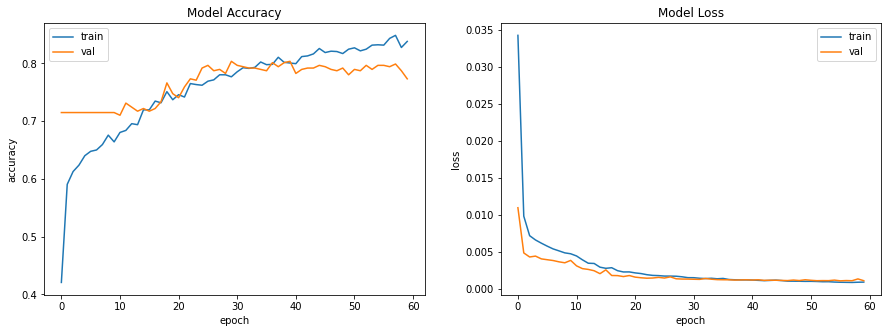

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(model_fit.history['accuracy'])
ax1.plot(model_fit.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'val'])

ax2.plot(model_fit.history['loss'])
ax2.plot(model_fit.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'val'])

In [44]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

# Load the saved model
from keras.models import load_model
model = load_model('model1.h5')  # <-- Saved model path


def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points

In [ ]:
for i in range(5):
  fig, axis = plt.subplots()
  plot_sample(test_images[i], detect_points(test_images[i]), axis, "Sample image & keypoints")

In [45]:
# Load haarcascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
dimensions = (96, 96)

# Enter the path to your test image
img = cv2.imread('/content/gdrive/MyDrive/113B0296-F007-49F3-9814-280EDA3FD452.jpeg')

default_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
# faces = face_cascade.detectMultiScale(gray_img, 4, 6)

faces_img = np.copy(gray_img)

plt.rcParams["axes.grid"] = False

In [46]:
if len(faces) == 0:
  print("Khong co khuon mat nao duoc phat hien")
else:
  print('Co khuon mat duoc phat hien')

Co khuon mat duoc phat hien


1/1 [==============================] - 0s 195ms/step


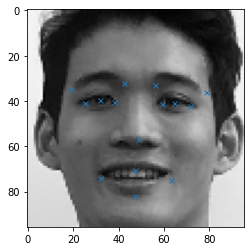

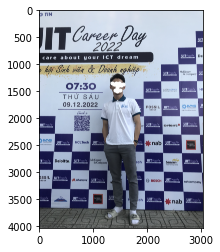

In [47]:
all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'x', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=3)
plt.show()

